In [1]:
%pylab inline
from pycheops.models import FactorModel, EclipseModel 
from lmfit import report_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
T_0 = 0.0
P = 2.0
D = 0.02
W = 0.04
S = 0.50
F = 0.005  # Planet-star flux ratio

In [3]:
m = FactorModel(prefix='s_') + FactorModel(prefix='p_')*EclipseModel()
pars = m.make_params(T_0=T_0, W=W, S=S)
pars['P'].set(value=P, vary=False)
pars['D'].set(value=D, vary=False)
pars.add(name='F', value=F, min=0)
pars['a_c'].set(value=0.001, vary=False)
pars['s_c'].set(expr='1/(1+F)')  # Flux from star 
pars['p_c'].set(expr='1/(1+1/F)')  # Flux from planet
pars

Parameters([('s_c',
             <Parameter 's_c', 0.9950248756218907, bounds=[-inf:inf], expr='1/(1+F)'>),
            ('p_c',
             <Parameter 'p_c', 0.004975124378109453, bounds=[-inf:inf], expr='1/(1+1/F)'>),
            ('T_0', <Parameter 'T_0', 0.0, bounds=[-inf:inf]>),
            ('P', <Parameter 'P', value=2.0 (fixed), bounds=[1e-15:inf]>),
            ('D', <Parameter 'D', value=0.02 (fixed), bounds=[0:1]>),
            ('W', <Parameter 'W', 0.04, bounds=[0:0.3]>),
            ('S', <Parameter 'S', 0.5, bounds=[0:1]>),
            ('f_c', <Parameter 'f_c', value=0 (fixed), bounds=[-1:1]>),
            ('f_s', <Parameter 'f_s', value=0 (fixed), bounds=[-1:1]>),
            ('a_c', <Parameter 'a_c', value=0.001 (fixed), bounds=[0:inf]>),
            ('k',
             <Parameter 'k', 0.1414213562373095, bounds=[0:1], expr='sqrt(D)'>),
            ('aR',
             <Parameter 'aR', 8.464330808241401, bounds=[1:inf], expr='2/(pi*W*sqrt((1-S)/k))'>),
            ('rho',
 

(0.9925, 1.0025)

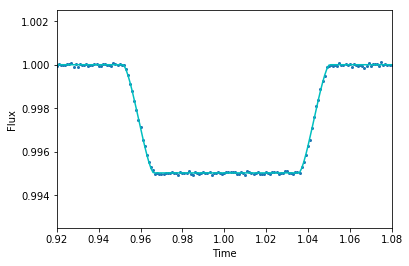

In [4]:
t = np.arange(T_0 + (0.5-W)*P,T_0 + (0.5+W)*P, 0.001)
yerr = 50e-6
flux_true = m.eval(params=pars, t=t)
flux = flux_true + normal(0.0, yerr, size=len(t))
fig,ax=subplots()
ax.scatter(t, flux,s=4)
ax.plot(t, flux_true,'c')
ax.set_xlabel('Time')
ax.set_ylabel('Flux')
ax.set_xlim(min(t),max(t))
ax.set_ylim(1-1.5*F,1+0.5*F)


In [5]:
result = m.fit(flux, pars, t=t, weights=1/yerr)
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 161
    # variables        = 4
    chi-square         = 150.570525
    reduced chi-square = 0.95904793
    Akaike info crit   = -2.78261832
    Bayesian info crit = 9.54299914
[[Variables]]
    s_c:  0.99502521 +/- 5.8485e-06 (0.00%) == '1/(1+F)'
    p_c:  0.00497479 +/- 5.8485e-06 (0.12%) == '1/(1+1/F)'
    T_0: -5.6934e-05 +/- 2.5433e-05 (44.67%) (init = 0)
    P:    2 (fixed)
    D:    0.02 (fixed)
    W:    0.03996047 +/- 8.0580e-05 (0.20%) (init = 0.04)
    S:    0.50167037 +/- 0.00290831 (0.58%) (init = 0.5)
    f_c:  0 (fixed)
    f_s:  0 (fixed)
    a_c:  0.001 (fixed)
    k:    0.14142136 +/- 0.00000000 (0.00%) == 'sqrt(D)'
    aR:   8.48689157 +/- 0.04138093 (0.49%) == '2/(pi*W*sqrt((1-S)/k))'
    rho:  2.05056602 +/- 0.00000000 (0.00%) == '0.013418*aR**3/P**2'
    b:    0.40948697 +/- 0.00808932 (1.98%) == 'sqrt(((1-k)**2-S*(1+k)**2)/(1-S))'
    F:    0.00499966 +/- 5.907

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

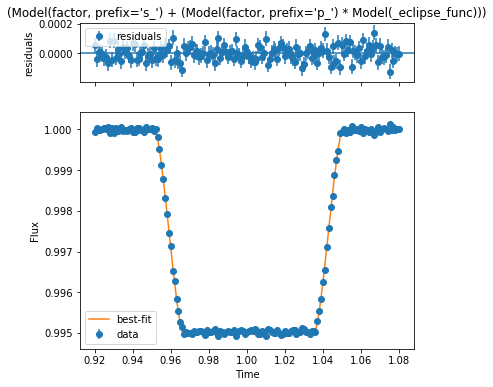

In [6]:
result.plot(xlabel='Time',ylabel='Flux')